In [64]:
import sqlite3
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
def calculate_distance(lat1, lon1):
    # Radius of the Earth in kilometers
    earth_radius = 6371

    # Convert latitude and longitude to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(44.4914)
    lon2_rad = math.radians(20.2744)

    # Calculate the differences between the latitudes and longitudes
    d_lat = lat2_rad - lat1_rad
    d_lon = lon2_rad - lon1_rad

    # Apply the Haversine formula
    a = math.sin(d_lat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(d_lon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = earth_radius * c

    return distance

In [53]:
import sqlite3

values = ["SUT", "PR", "VPR"]

mapping = {
    "SUT": 0,
    "PR": 0.5,
    "VPR": 0.75
}

# Connect to the database
conn = sqlite3.connect('db_prodaja_stanova_Nis.db')

# Create a cursor object
cursor = conn.cursor()
df = pd.read_sql_query("SELECT * FROM mytable", conn)

# Execute a SELECT query
cursor.execute("SELECT * FROM mytable")

X_data = list()
Y_data = list()
full_data = list()

# Fetch and print rows one by one
row1 = cursor.fetchone()
row = cursor.fetchone()
while row is not None:
    # print(row)
    coordinates = row[4]
    latitude, longitude = coordinates.split(',')
    distance = calculate_distance(float(latitude), float(longitude))
    

    broj_soba = row[5]

    if broj_soba == None:
        row = cursor.fetchone()
        continue
    broj_soba = float(broj_soba) if broj_soba != '5+' else 5.0


    kvadratura = float(row[6])
    if kvadratura == None:
        row = cursor.fetchone()
        continue


    sprat = row[7]
    if sprat == None:
        row = cursor.fetchone()
        # print(sprat)
        continue
    if sprat in values:
        sprat = mapping[sprat]
    else:
        sprat = float(sprat)
    sprat = math.log2(sprat + 1)


    # print(row)

    tip_gradnje = row[8]
    tip_gradnje = 1 if tip_gradnje == 'Novogradnja' else 0
    # else:
    #     break
    uknjizen = float(row[9])
    lift = float(row[10])
    garaza = float(row[11])
    terasa = float(row[12])
    pdv = float(row[13])

    cena = float(row[16])
    # , legal, air_c, elevator, garage

    row_x_data = [distance, broj_soba, kvadratura, sprat, tip_gradnje, uknjizen, lift, garaza, terasa, pdv]
    row_full_data = [distance, broj_soba, kvadratura, sprat, tip_gradnje, uknjizen, lift, garaza, terasa, pdv, cena]
    full_data.append(row_full_data)
    X_data.append(row_x_data)
    Y_data.append(cena)

    row = cursor.fetchone()

# Close the connection
conn.close()



In [55]:
header = ['distance', 'broj_soba', 'kvadratura', 'sprat', 'tip_gradnje', 'uknjizen', 'lift', 'garaza', 'terasa', 'pdv', 'cena']
df = pd.DataFrame(full_data, columns=header)
print(df)

       distance  broj_soba  kvadratura     sprat  tip_gradnje  uknjizen  lift  \
0    184.148552        1.5       32.00  1.584963            1       1.0   0.0   
1    185.381104        2.5       67.00  3.459432            0       1.0   1.0   
2    185.861640        2.0       49.00  1.584963            1       1.0   0.0   
3    185.120729        3.0       69.00  3.584963            0       1.0   1.0   
4    184.720758        2.0       60.00  3.584963            0       1.0   1.0   
..          ...        ...         ...       ...          ...       ...   ...   
248  184.671500        1.5       46.00  0.807355            0       1.0   0.0   
249  184.275234        2.0       58.00  2.321928            0       1.0   1.0   
250  183.943711        2.5       54.00  2.321928            0       1.0   0.0   
251  184.831066        1.5       44.67  1.000000            1       0.0   1.0   
252  192.173145        3.0       90.00  2.000000            1       1.0   0.0   

     garaza  terasa  pdv   

In [57]:
price_ranges = [0, 50000, 100000, 150000, 200000, 500000, float('inf')]
categories = [0,1,2,3,4,5]
df['cena'] = pd.cut(df['cena'], bins=price_ranges, labels=categories)
print(df)

       distance  broj_soba  kvadratura     sprat  tip_gradnje  uknjizen  lift  \
0    184.148552        1.5       32.00  1.584963            1       1.0   0.0   
1    185.381104        2.5       67.00  3.459432            0       1.0   1.0   
2    185.861640        2.0       49.00  1.584963            1       1.0   0.0   
3    185.120729        3.0       69.00  3.584963            0       1.0   1.0   
4    184.720758        2.0       60.00  3.584963            0       1.0   1.0   
..          ...        ...         ...       ...          ...       ...   ...   
248  184.671500        1.5       46.00  0.807355            0       1.0   0.0   
249  184.275234        2.0       58.00  2.321928            0       1.0   1.0   
250  183.943711        2.5       54.00  2.321928            0       1.0   0.0   
251  184.831066        1.5       44.67  1.000000            1       0.0   1.0   
252  192.173145        3.0       90.00  2.000000            1       1.0   0.0   

     garaza  terasa  pdv ce

In [58]:
df.head()

,distance,broj_soba,kvadratura,sprat,tip_gradnje,uknjizen,lift,garaza,terasa,pdv,cena
0,184.148552,1.5,32.0,1.584963,1,1.0,0.0,0.0,0.0,0.0,1
1,185.381104,2.5,67.0,3.459432,0,1.0,1.0,0.0,1.0,0.0,2
2,185.861640,2.0,49.0,1.584963,1,1.0,0.0,0.0,1.0,0.0,1
3,185.120729,3.0,69.0,3.584963,0,1.0,1.0,0.0,1.0,0.0,1
4,184.720758,2.0,60.0,3.584963,0,1.0,1.0,0.0,0.0,0.0,1


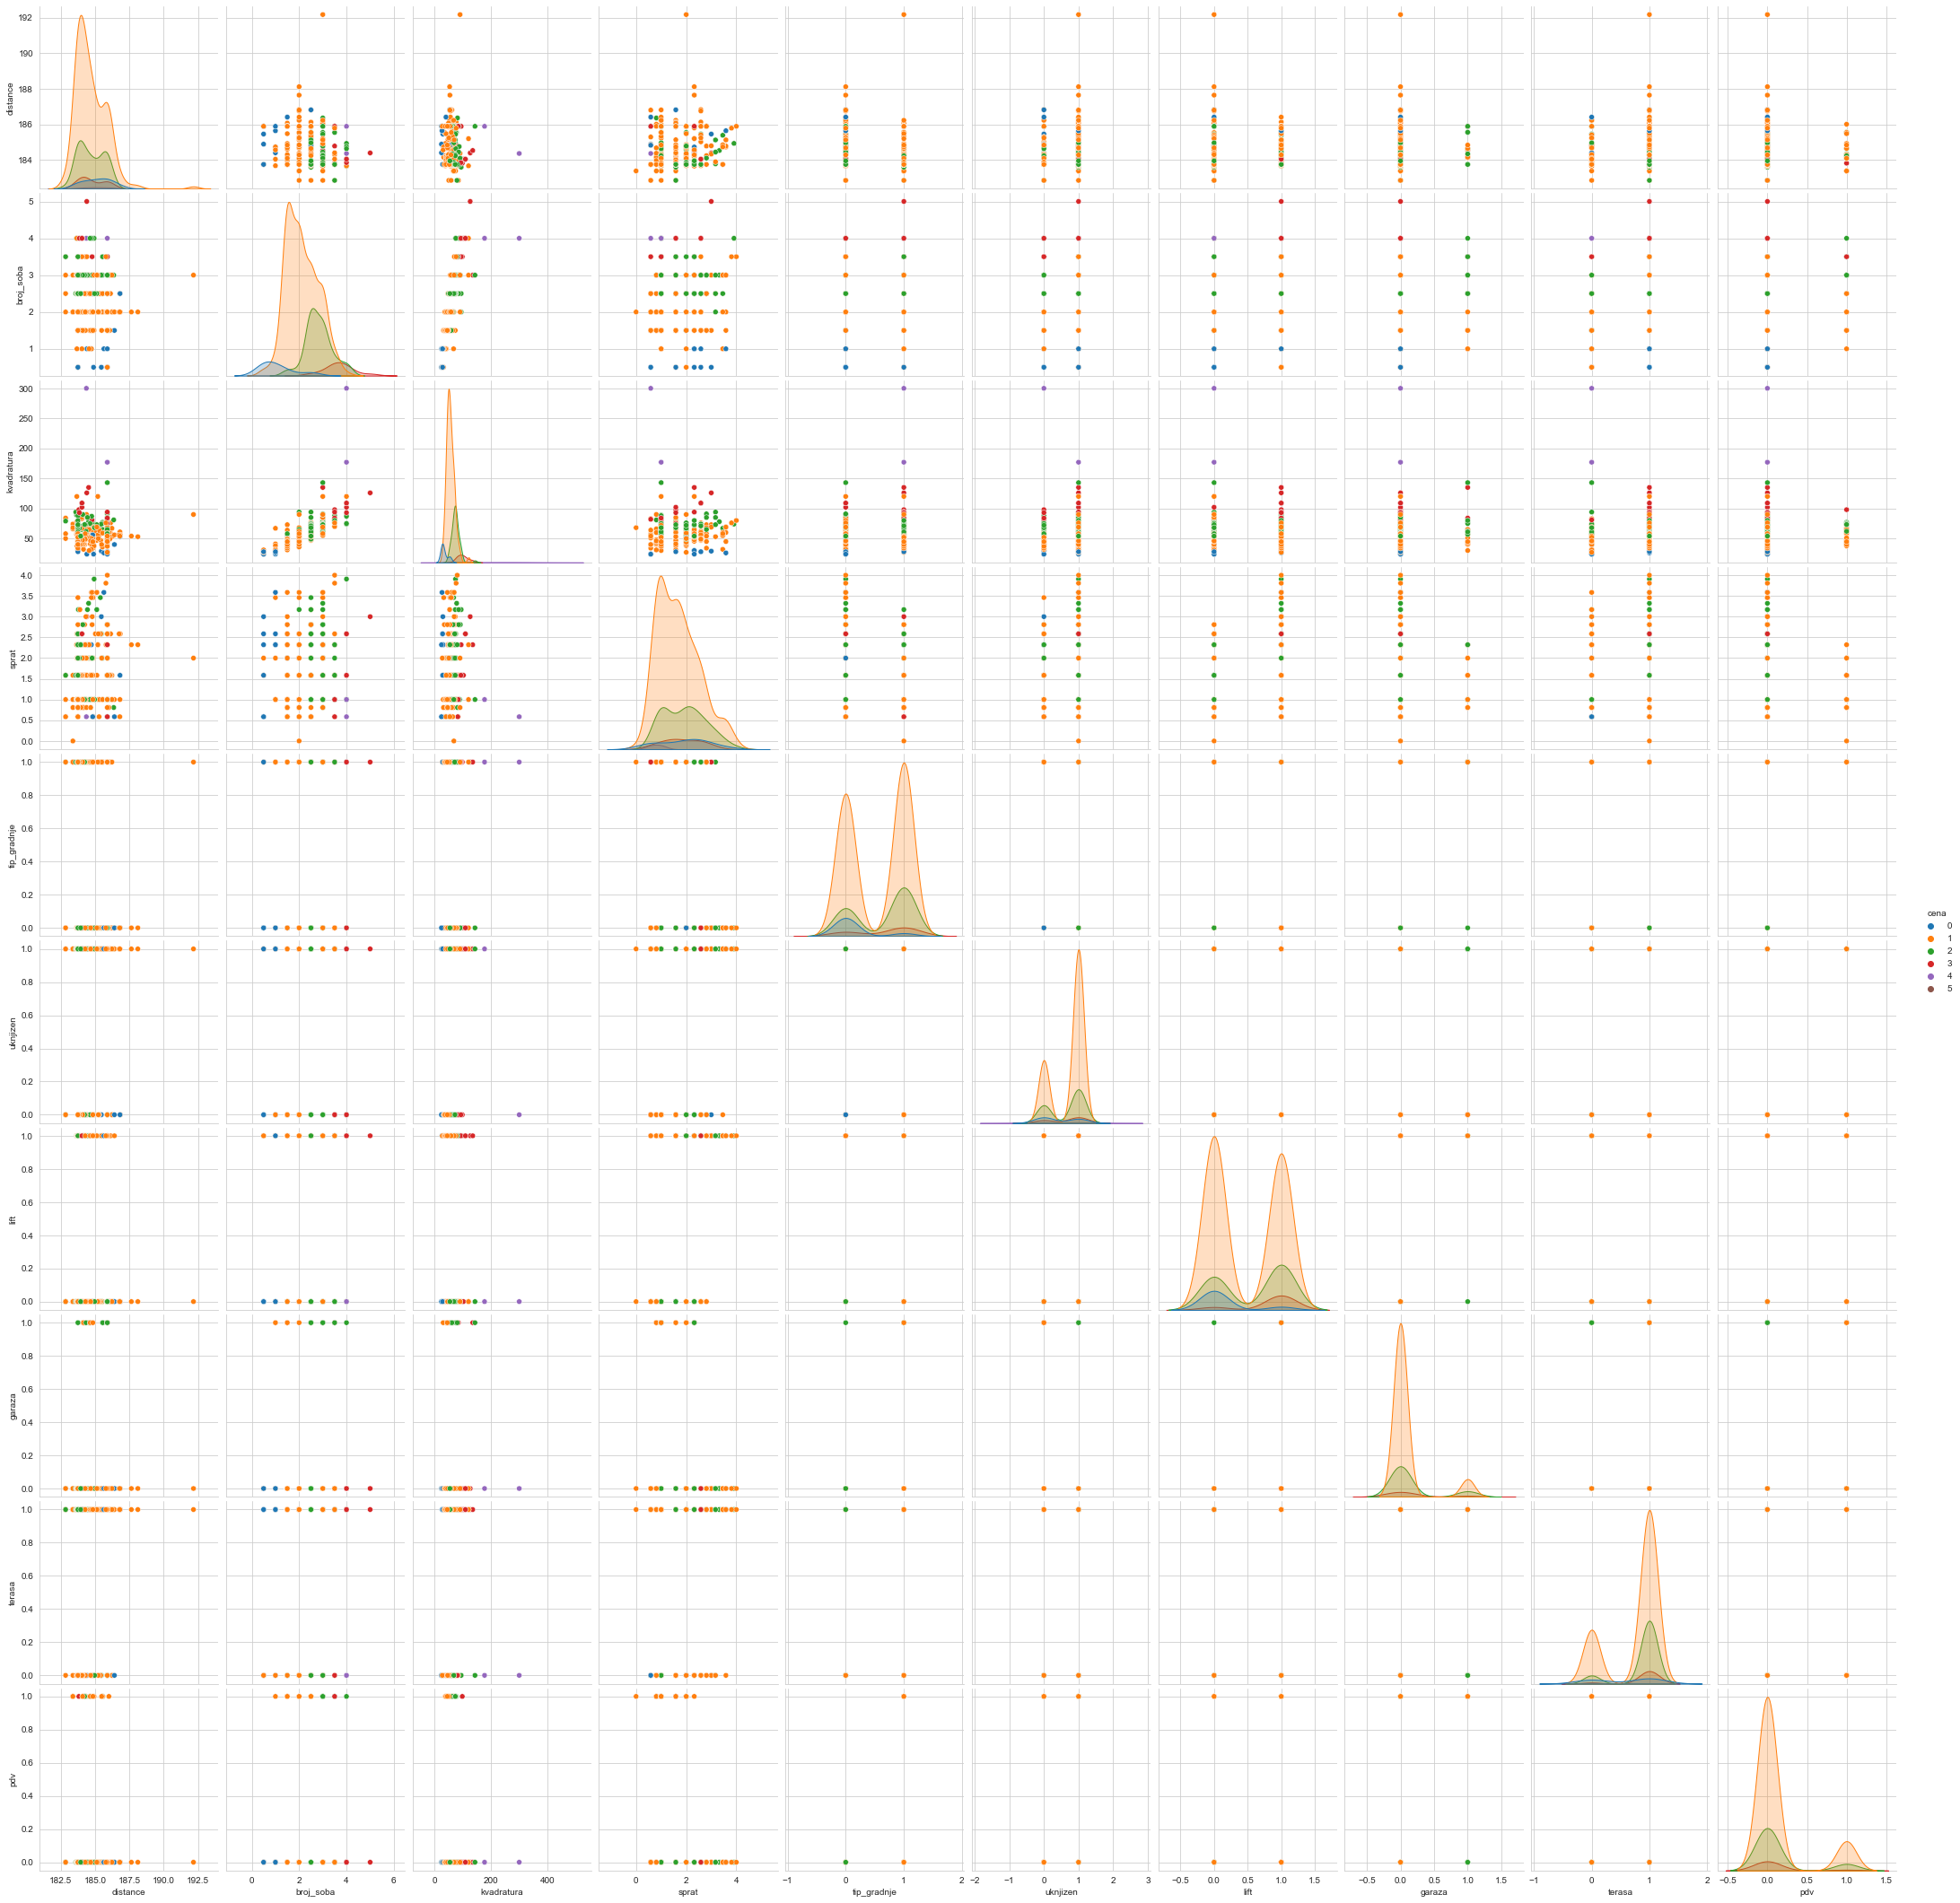

In [59]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, hue='cena', height=3)
plt.show()

In [49]:
header = ['distance', 'broj_soba', 'kvadratura', 'sprat', 'tip_gradnje', 'uknjizen', 'lift', 'garaza', 'terasa', 'pdv']
df_x = pd.DataFrame(X_data, columns=header)
print(df_x)

       distance  broj_soba  kvadratura     sprat  tip_gradnje  uknjizen  lift  \
0    184.148552        1.5       32.00  1.584963            1       1.0   0.0   
1    185.381104        2.5       67.00  3.459432            0       1.0   1.0   
2    185.861640        2.0       49.00  1.584963            1       1.0   0.0   
3    185.120729        3.0       69.00  3.584963            0       1.0   1.0   
4    184.720758        2.0       60.00  3.584963            0       1.0   1.0   
..          ...        ...         ...       ...          ...       ...   ...   
248  184.671500        1.5       46.00  0.807355            0       1.0   0.0   
249  184.275234        2.0       58.00  2.321928            0       1.0   1.0   
250  183.943711        2.5       54.00  2.321928            0       1.0   0.0   
251  184.831066        1.5       44.67  1.000000            1       0.0   1.0   
252  192.173145        3.0       90.00  2.000000            1       1.0   0.0   

     garaza  terasa  pdv  


In [62]:

y_data = df['cena']
print(y_data)

0      1
1      2
2      1
3      1
4      1
      ..
248    1
249    1
250    2
251    1
252    1
Name: cena, Length: 253, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]


In [60]:
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(X_data)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)
result = confusion_matrix(y_test, ypred)
print("confusion matrix")
print(result)
result1 = classification_report(y_test, ypred)
print("classification report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("accuracy:",result2)

confusion matrix
[[ 0  1  0  0  0]
 [ 0 32  4  0  0]
 [ 0  6  3  1  0]
 [ 0  1  1  0  0]
 [ 0  0  0  2  0]]
classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      0.89      0.84        36
           2       0.38      0.30      0.33        10
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2

    accuracy                           0.69        51
   macro avg       0.24      0.24      0.24        51
weighted avg       0.64      0.69      0.66        51

accuracy: 0.6862745098039216


C:\Users\busketi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\busketi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\busketi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344

In [67]:

result = confusion_matrix(y_test, ypred)
print("confusion matrix")
print(result)
result1 = classification_report(y_test, ypred)
print("classification report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("accuracy:",result2)

confusion matrix
[[ 0  1  0  0  0]
 [ 0 32  4  0  0]
 [ 0  6  3  1  0]
 [ 0  1  1  0  0]
 [ 0  0  0  2  0]]
classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      0.89      0.84        36
           2       0.38      0.30      0.33        10
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2

    accuracy                           0.69        51
   macro avg       0.24      0.24      0.24        51
weighted avg       0.64      0.69      0.66        51

accuracy: 0.6862745098039216


C:\Users\busketi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\busketi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\busketi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344